In [1]:
from __future__ import print_function
import cv2 as cv
import argparse
import numpy as np
algo = 'MOG2'
masks = []
frames = []

if algo == 'MOG2':
    backSub = cv.createBackgroundSubtractorMOG2()
else:
    backSub = cv.createBackgroundSubtractorKNN()

capture = cv.VideoCapture(cv.samples.findFileOrKeep("./data/storm.mp4"))
if not capture.isOpened:
    print('Unable to open: ' + args.input)
    exit(0)
while True:
    ret, frame = capture.read()
    if frame is None:
        break
    frame = cv.resize(frame, (256,256))
#     fgMask = backSub.apply(frame)
    
    mask = cv.inRange(frame, (240,240,240), (255,255,255))
    
#     cv.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
#     cv.putText(frame, str(capture.get(cv.CAP_PROP_POS_FRAMES)), (15, 15),
#                cv.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
    
    masks.append(mask)
    frames.append(frame)
#     cv.imshow('Frame', frame)
#     cv.imshow('FG Mask', mask)
    
#     keyboard = cv.waitKey(0)
#     if keyboard == 'q' or keyboard == 27:
#         break

In [2]:
masks = np.asarray(masks)
frames = np.asarray(frames)
print(masks.shape, frames.shape)

frame_list = []
for frame in frames:
    frame_list.append(np.array(frame))
# np.save(open("./data/storm_frames.npy", "wb"), np.array(frame_list))

(53, 256, 256) (53, 256, 256, 3)


In [6]:
mask_thresh = []
for i in range(1, len(masks) - 2):
    mask_thresh.append(np.array(masks[i]) > 0)

In [23]:
import numpy as np
np.save(open("./data/mask_thresh_marine.npy", "wb"), np.array(mask_thresh))

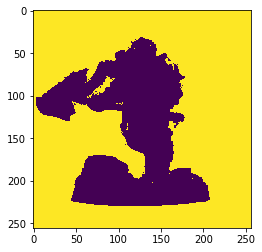

In [11]:
import matplotlib.pyplot as plt
plt.imshow(mask_thresh[10])
plt.show()